<a href="https://colab.research.google.com/github/Karanuderani07/ML_LEARNING/blob/main/Exp_7_Gradient_decent_on_House_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data loading and preprocessing: You fill missing numeric values with the median, which is good
#select relevant columns for X and y.
#scale features and add the intercept term correctly.
#Gradient descent and cost function:
#cost function computes MSE properly.
#Gradient descent updates theta correctly.
#track cost history to monitor convergence.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()


Saving housing.csv to housing (1).csv


In [ ]:
data = pd.read_csv('housing.csv')


print(data.head())

numeric_cols = data.select_dtypes(include=np.number).columns
non_numeric_cols = data.select_dtypes(exclude=np.number).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = data['median_house_value']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Optimal theta values: [206846.88668526 -43514.1595037  -48696.36405798  20322.8257137
  -4435.37107666  20745.01907708 -32215.98255618  23457.59529202
  78225.19339136]


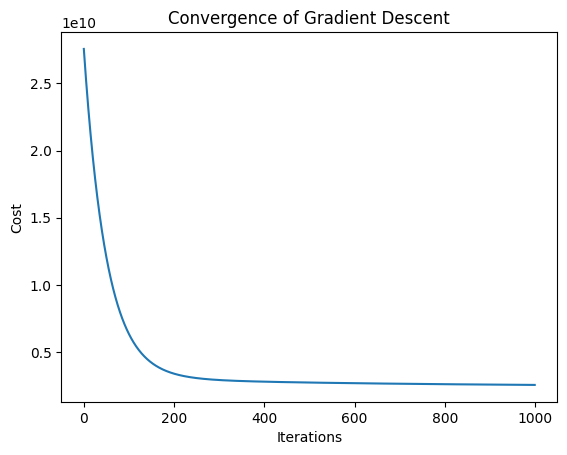

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (alpha/m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


theta_initial = np.zeros(X_scaled.shape[1])

alpha = 0.01
iterations = 1000

theta_optimal, cost_history = gradient_descent(X_scaled, y, theta_initial, alpha, iterations)

print(f"Optimal theta values: {theta_optimal}")

import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history, label="Cost Function")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.show()
